<a href="https://colab.research.google.com/github/riyaroy2086/ML-Projects/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#To convert img data into numpy arrays
#visualizing the img done
import numpy as np 
#once we feed the numpy array to the plotlib we can see what the img is
import matplotlib.pyplot as plt
#Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.
import seaborn as sns 
#cv lib is a open computer vision lib -> img processing task
import cv2
#to display an img
from google.colab.patches import cv2_imshow
# PIL is PILLOW-> img processing task
from PIL import Image
import tensorflow as tf
# When we feed the neural network w/ the trained data , the neutal network learns from it
#Later when we test it w/ testing data , and if the seed (any value for say) is not provided
#it will generate slightly diff vaalue even if same input is given
#1 or 2 or any no. in the seed will produce identical results 
tf.random.set_seed(1)
#dl lib to create neural network
from tensorflow import keras
# importing the dataset
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Data Collection Part (MNIST data ) from keras dataset

It already pre processed the imgs


In [12]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
# we will get 4 arrays

In [13]:
# imgs have already been converted to numpt array
type(X_train) # n dimensional array

numpy.ndarray

In [14]:
#Shape of the numpy arrays
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
#(no. of imgs, width,height,grayscale or rgb )

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:

#printing a particular img
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [16]:
#printing the dimension
print(X_train[5].shape)

(28, 28)


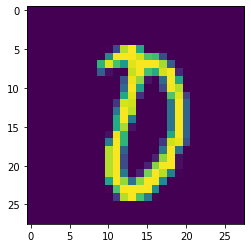


Training label contains 0 at the exact same index.


In [17]:
#displaying the img
plt.imshow(X_train[1600])
plt.show()

print("")
#printing the corresponding label for X_train +nt in tthe Y_train
print("Training label contains",Y_train[1600],"at the exact same index.")

Label uniqueness 

In [18]:
print(np.unique(Y_train)) #finding all the unque arrays in numpy array Y_train

[0 1 2 3 4 5 6 7 8 9]


In [19]:
print(np.unique(Y_test)) #finding all the unque arrays in numpy array Y_test

[0 1 2 3 4 5 6 7 8 9]


One Hot encoding (study this)

In [20]:
#GrayScaling the values fo the imgs in the range 0 to 1
X_train = X_train/255
X_test = X_test/255

In [21]:
#printing a particular img
print(X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Processing section done

Creating the neural network

CNN(convolutional neural network) is mainly for img recognision and recurrent neural network is used for voice, audio etc

In [22]:
#Setting up the layers of the neural network
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     #Flatten flattens the 2D array into a single line
     keras.layers.Dense(50,activation='relu'), #Rectified Linear Unit
     keras.layers.Dense(50,activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')# output layer
     # there are only 10 digits as the labels
     #so this needs to be 10
     #relu activation functions no. can be diff

])

In [23]:
# Compilation of thr Neural Network
model.compile(optimizer = 'adam', #optimizer selectio depends on the accuracy lvl
              loss ='sparse_categorical_crossentropy',
              # simple digits
              metrics= ['accuracy'])

In [24]:
#Training the neural Network
model.fit(X_train,Y_train,epochs=10) #no. of the times neural network wo=ill go thru the data


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2996 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1418 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1048 - accuracy: 0.9677
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0839 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0694 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0512 - accuracy: 0.9832
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0439 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

Accuracy of traning data = 0.9945 or 99.45%

In [26]:
loss,accuracy = model.evaluate(X_test, Y_test)
print("The test data accuracy",accuracy,"or",accuracy*100,"%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9718
The test data accuracy 0.9718000292778015 or 97.18000292778015 %


In [27]:
print(X_test.shape)

(10000, 28, 28)


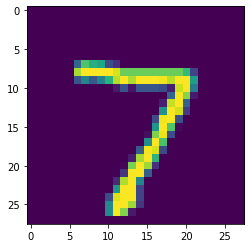


7


In [28]:
plt.imshow(X_test[0]) # the first data pnt in X_test
plt.show()

print("")
print(Y_test[0])

In [29]:
Y_prediction = model.predict(X_test) # predict labels for all the 10k imgs


313/313 [==============================] - 1s 2ms/step


In [30]:
print(Y_prediction.shape) #10 becoz there are 10 values in a single label printing probabilities as the neural network visita=s all the 10 labels

(10000, 10)


In [31]:
print(Y_prediction[0]) 

[7.8342082e-06 2.3998406e-03 4.9317149e-03 9.9058336e-01 1.0772469e-05
 7.5077456e-03 3.0086502e-12 9.9999541e-01 2.0027929e-03 9.5816600e-01]


model.predict() gives the prediction probability of each class for that data point -- VVIMP


In [32]:
#Converting the pred probabilities to class label
# max val -> ans
label_for_first_test_image = np.argmax(Y_prediction[0])
print(label_for_first_test_image)

7


In [33]:
#Converting the pred probabilities to class label for test data pnts
Y_pred_labels=[np.argmax(i) for i in Y_prediction]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 9, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusin Matrix

In [34]:
con_mat = confusion_matrix(Y_test,Y_pred_labels) 
# Y_test -> 1st one -> true label
# Y_pred_labels -> 
print(con_mat)

tf.Tensor(
[[ 967    0    1    1    1    1    1    1    3    4]
 [   0 1122    5    2    0    1    2    1    2    0]
 [   5    0  998    7    4    0    3    7    8    0]
 [   1    0    7  986    0    2    0    5    4    5]
 [   1    0    4    0  962    0    3    1    0   11]
 [   2    0    0   16    1  860    3    0    5    5]
 [   5    3    1    1   14   12  913    0    7    2]
 [   0    0    8    3    3    0    0  995    1   18]
 [   3    1    3   15    6    7    1    2  925   11]
 [   0    3    0    2    8    2    0    4    0  990]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

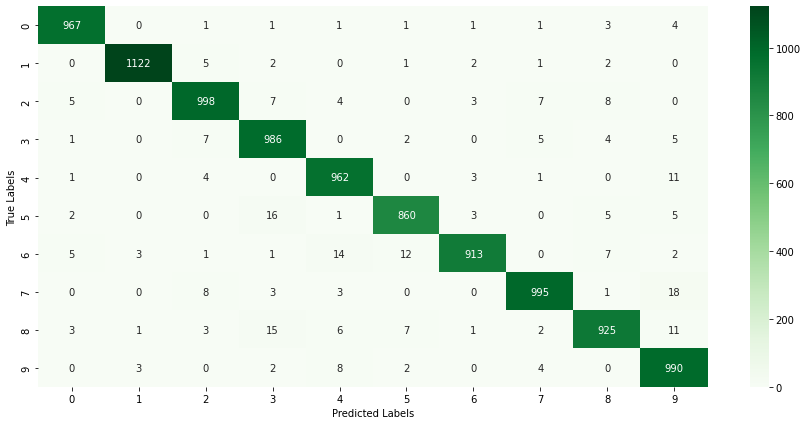

In [35]:
plt.figure(figsize=(15,7)) # to construct the e-map
sns.heatmap(con_mat,annot=True,fmt='d', cmap='Greens')
# all vals are Integers so fmt = d
# building the map using the confusin matix

#axes names
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a predirtion System

In [98]:
input_image_path =input("Path of the image to be predicted : ")

Path of the image to be predicted : /content/six.png


In [99]:
input_image=cv2.imread(input_image_path)

In [100]:
type(input_image)

numpy.ndarray

In [102]:
print(input_image)

[[[17 17 17]
  [11 11 11]
  [10 10 10]
  ...
  [10 10 10]
  [18 18 18]
  [55 55 55]]

 [[ 9  9  9]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 2  2  2]
  [11 11 11]
  [52 52 52]]

 [[ 8  8  8]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [10 10 10]
  [51 51 51]]

 ...

 [[ 8  8  8]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [10 10 10]
  [51 51 51]]

 [[ 9  9  9]
  [ 3  3  3]
  [ 2  2  2]
  ...
  [ 2  2  2]
  [11 11 11]
  [51 51 51]]

 [[ 9  9  9]
  [ 2  2  2]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [11 11 11]
  [51 51 51]]]


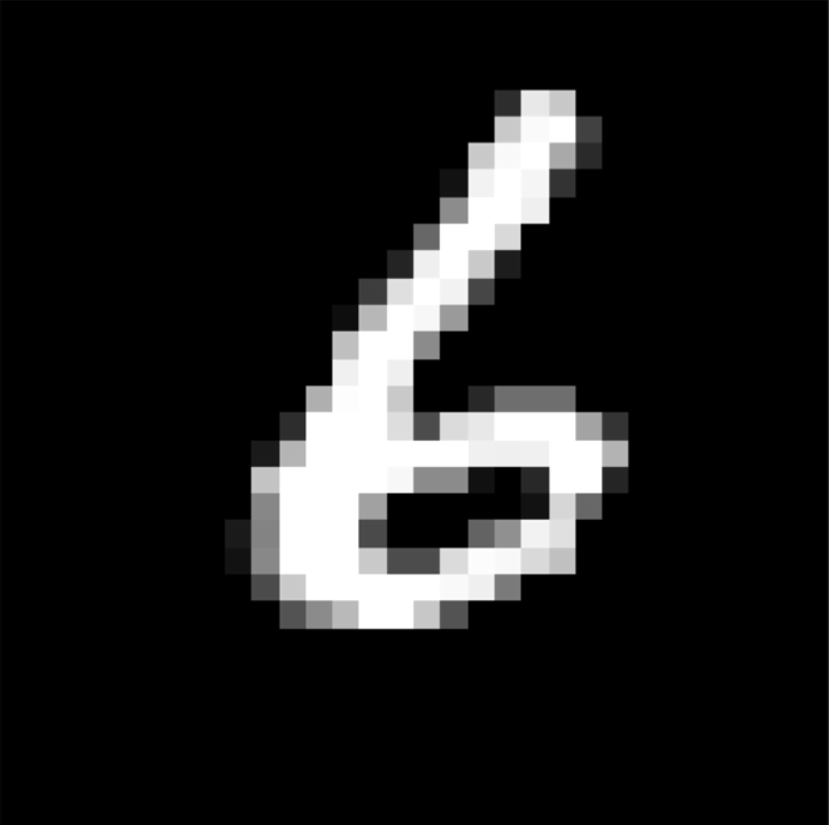

(825, 829, 3)

In [103]:
cv2_imshow(input_image)
print('')
input_image.shape # which is rgb here

In [104]:
#Converting into grayScale image
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
grayscale.shape

(825, 829)

In [105]:
#Resizing the inage into 28*28
#using PIL lib
input_image_resize=cv2.resize(grayscale,(28,28))

In [106]:
input_image_resize.shape

(28, 28)

In [107]:
cv2_imshow(input_image_resize)

In [108]:
# To Scale all the vals from 0 to 1
input_image_resize = input_image_resize/255

In [109]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])
# providing the neural network only 1 img 

In [110]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[2.5483423e-01 6.6144839e-03 4.2147461e-01 5.6932061e-03 9.8898351e-01
  8.5853481e-01 9.9959129e-01 3.5709843e-05 5.3344265e-04 4.2829424e-02]]


In [111]:
input_pred_label = np.argmax(input_prediction)
print("The img is recognized as",input_pred_label)

The img is recognized as 6
